In [ ]:
!pip install ctgan
!pip install table_evaluator

In [1]:
# import the library we will use
from table_evaluator import TableEvaluator
from ctgan import CTGANSynthesizer
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# import the dataset
from google.colab import files
uploaded = files.upload()

Saving bank_term_deposit.csv to bank_term_deposit.csv


In [7]:
dataset = pd.read_csv('bank_term_deposit.csv', sep=';')

raw_X = dataset.iloc[1:,1:16]
y = dataset.iloc[1:,16]
# fill Nan value
raw_X = raw_X.fillna(raw_X.mean())
with pd.option_context('display.max_colwidth', None):
  display(raw_X)

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
1,services,married,secondary,no,4789.000000,yes,yes,cellular,11,may,220,1,339,4,failure
2,management,single,tertiary,no,135.000000,yes,no,cellular,16,apr,185,1,330,1,failure
3,management,married,tertiary,no,1476.000000,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,blue-collar,married,secondary,no,1136.594043,yes,no,unknown,5,may,226,1,-1,0,unknown
5,management,single,tertiary,no,747.000000,no,no,cellular,23,feb,141,2,176,3,failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,-333.000000,yes,no,cellular,30,jul,329,5,-1,0,unknown
4517,self-employed,married,tertiary,yes,-3313.000000,yes,yes,unknown,9,may,153,1,-1,0,unknown
4518,technician,married,secondary,no,295.000000,no,no,cellular,19,aug,151,11,-1,0,unknown
4519,blue-collar,married,secondary,no,1137.000000,no,no,cellular,6,feb,129,4,211,3,other


In [ ]:
# Identifies all the discrete columns
discrete_columns = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'poutcome',
]
ctgan = CTGANSynthesizer(epochs=5)
ctgan.fit(raw_X, discrete_columns)

In [ ]:
#sample the synthetic data
synthetic_data = ctgan.sample(dataset.shape[0]-1)
with pd.option_context('display.max_colwidth', None):
  display(synthetic_data)

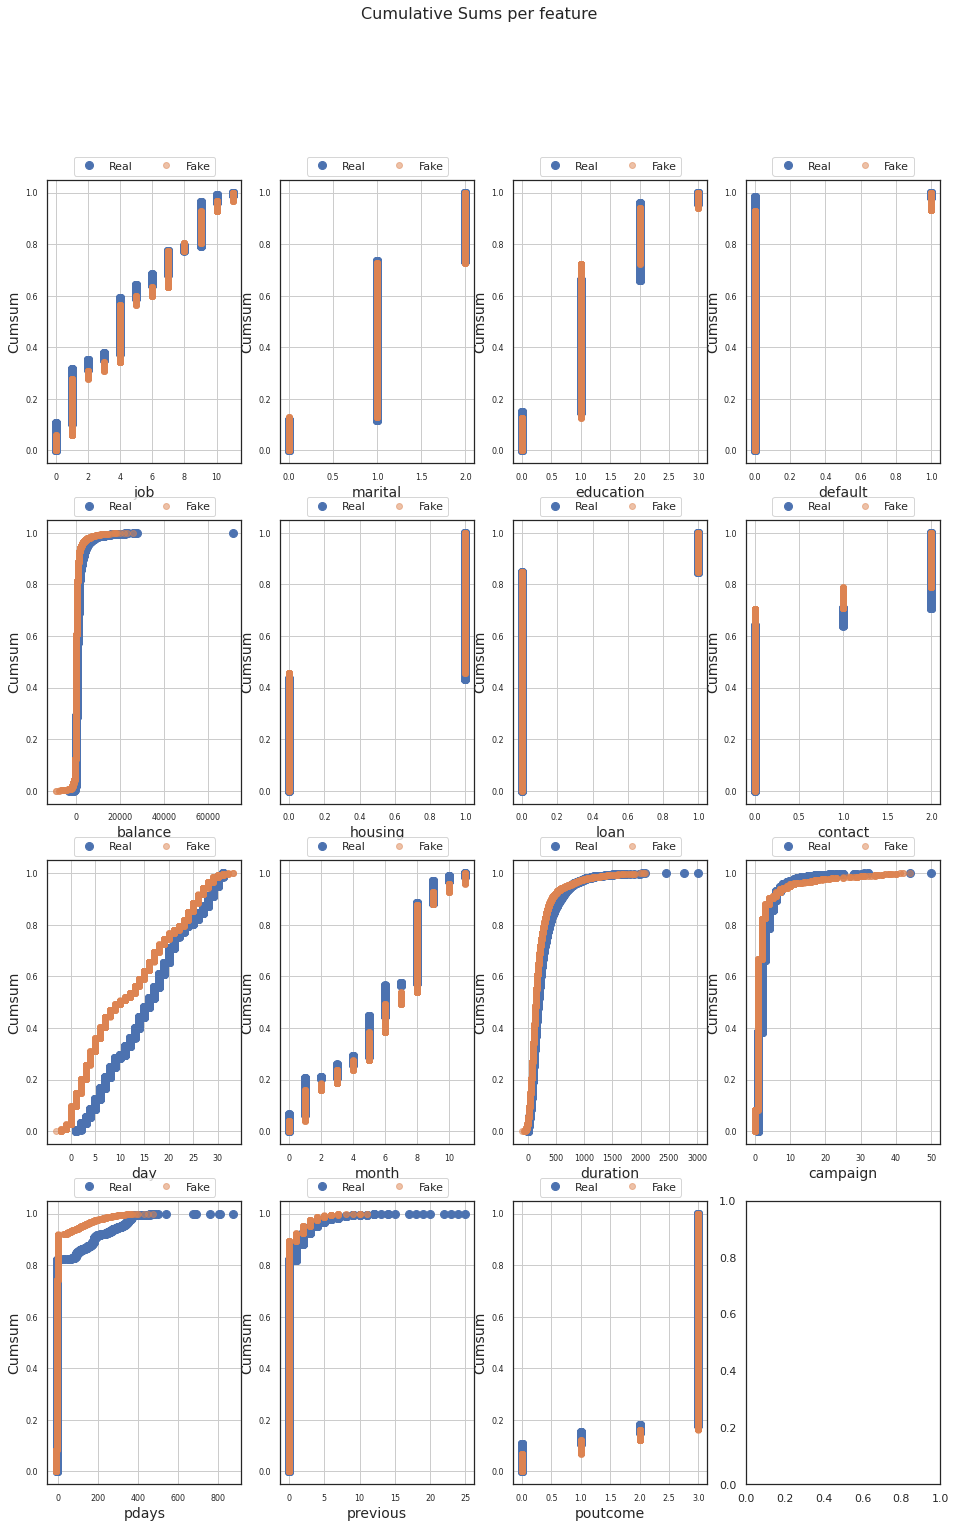

In [ ]:
# table evaluation
table_evaluator = TableEvaluator(raw_X, synthetic_data)
table_evaluator.visual_evaluation()

In [ ]:
# do some preprocessing, covert the category variable into dummy variable
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
for discrete_column in discrete_columns:
  raw_X[discrete_column] = lb_make.fit_transform(raw_X[discrete_column])
  synthetic_data[discrete_column] = lb_make.fit_transform(synthetic_data[discrete_column])

In [ ]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(raw_X,y,test_size = 0.25,random_state = 3)
S_X_train, S_X_test, S_y_train, S_y_test = train_test_split(synthetic_data,y,test_size = 0.25,random_state = 3)

In [ ]:
# using Decision tree to predict
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion ='entropy', random_state = 1)
classifier.fit(X_train, y_train)
# Predict the test set
y_pred = classifier.predict(X_test)

# Showing the accuracy rate and making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
accuracy = np.trace(matrix) / float(np.sum(matrix))
print("Cofusion Matrix for raw data")
print(matrix)
print("The accuracy is: {:.2%}".format(accuracy))


Cofusion Matrix for raw data
[[931  85]
 [ 61  53]]
The accuracy is: 87.08%


In [ ]:
# using Decision tree to predict
classifier = DecisionTreeClassifier(criterion ='entropy', random_state = 1)
classifier.fit(S_X_train, S_y_train)
# Predict the test set
S_y_pred = classifier.predict(S_X_test)

# Showing the accuracy rate and making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(S_y_test, S_y_pred)
accuracy = np.trace(matrix) / float(np.sum(matrix))
print("Cofusion Matrix for synthetic data")
print(matrix)
print("The accuracy is: {:.2%}".format(accuracy))


Cofusion Matrix for synthetic data
[[872 144]
 [ 98  16]]
The accuracy is: 78.58%


In [ ]:
# using logistic regression to predict
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 3,solver='lbfgs', max_iter=1000)
classifier.fit(X_train, y_train)
# Predict the test set
y_pred = classifier.predict(X_test)

# Showing the accuracy rate and making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
accuracy = np.trace(matrix) / float(np.sum(matrix))
print("Cofusion Matrix for raw data")
print(matrix)
print("The accuracy is: {:.2%}".format(accuracy))


Cofusion Matrix for raw data
[[996  20]
 [ 95  19]]
The accuracy is: 89.82%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# using logistic regression to predict
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 3,solver='lbfgs', max_iter=1000)
classifier.fit(X_train, y_train)
# Predict the test set
S_y_pred = classifier.predict(S_X_test)

# Showing the accuracy rate and making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(S_y_test, S_y_pred)
accuracy = np.trace(matrix) / float(np.sum(matrix))
print("Cofusion Matrix for synthetic data")
print(matrix)
print("The accuracy is: {:.2%}".format(accuracy))


Cofusion Matrix for synthetic data
[[979  37]
 [108   6]]
The accuracy is: 87.17%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
# Predict the test set
y_pred = classifier.predict(X_test)

# Showing the accuracy rate and making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
accuracy = np.trace(matrix) / float(np.sum(matrix))
print("Cofusion Matrix for raw data")
print(matrix)
print("The accuracy is: {:.2%}".format(accuracy))

Cofusion Matrix for raw data
[[911 105]
 [ 74  40]]
The accuracy is: 84.16%


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(S_X_train, S_y_train)
# Predict the test set
S_y_pred = classifier.predict(S_X_test)

# Showing the accuracy rate and making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(S_y_test, S_y_pred)
accuracy = np.trace(matrix) / float(np.sum(matrix))
print("Cofusion Matrix for synthetic data")
print(matrix)
print("The accuracy is: {:.2%}".format(accuracy))

Cofusion Matrix for synthetic data
[[1012    4]
 [ 114    0]]
The accuracy is: 89.56%
